## Data Preprocessing
The purpose of this notebook is to demo the data preprocessing flow to preprocess signal traces from the STEAD seismic signal dataset for use in CNN model training. See `data_preprocessing` module for more.

### Environment setup

In [1]:
import os
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from PIL import Image

from earthquake_detection.data_preprocessing import DataPreprocessing

In [2]:
plt.ioff() # Turn off matplotlib interactive mode to ensure plots are fully clearing from memory after saving to array. Prevents  memory leakage.

### Parameters

In [3]:
SUBSAMPLE_N = 100000
WEIGHTED = True

### Get paths to saved dataset files

In [4]:
# Get data directory path to the locally saved STEAD dataset files from saved environment variable
data_dir_path = os.environ.get('STEAD_DATA_DIR_PATH', 'key does not exist')

In [5]:
data_dir_path

'/Users/kaelynnrose/Documents/DATA_SCIENCE/data/STEAD'

### Data preprocessing

In [6]:
# Initialize DataPreprocessing object
preproc = DataPreprocessing(data_dir_path=data_dir_path, subsample_n=SUBSAMPLE_N, weighted=WEIGHTED)

Fetching data paths from directory
Parsing metadata from csv files


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:07<00:00,  1.32s/it]


Number of total traces: 1265657
Number of earthquake traces: 1030231
Number of noise traces: 235426
Fetching subsample of traces from hdf5 files
Weighting random sample based on category label
Parsing traces from h5py filepaths


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:28<00:00, 24.72s/it]


In [7]:
raw_signals = preproc.subsample_traces
metadata = preproc.subsample_metadata

In [8]:
# Save raw signals
signals = np.array(list(raw_signals.values()))
np.save(f'../../../data/STEAD/extracted_raw_signals_subsample_{SUBSAMPLE_N}.npy', signals)

# Save metadata
metadata.to_feather(f'../../../data/STEAD/extracted_metadata_subsample_{SUBSAMPLE_N}.feather')

In [9]:
# Create waveform images
waveform_imgs = preproc.create_waveform_images(img_width=3, img_height=2, img_dpi=100)

# Save waveform images
np.save(f'../../../data/STEAD/created_waveform_images_subsample_{SUBSAMPLE_N}.npy', waveform_imgs)

Creating waveform images from signal traces


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [41:39<00:00, 40.01it/s]


In [10]:
# Create spectrogram images
spectrogram_imgs = preproc.create_spectrogram_images(img_width=3, img_height=2, img_dpi=100)

# Save spectrogram images
np.save(f'../../../data/STEAD/created_spectrogram_images_subsample_{SUBSAMPLE_N}.npy', spectrogram_imgs)

Creating spectrogram images from signal traces


 19%|████████████████████▋                                                                                         | 18856/100000 [10:23<31:28, 42.98it/s]/opt/miniconda3/envs/earthquake-detection/lib/python3.12/site-packages/matplotlib/axes/_axes.py:8089: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [51:09<00:00, 32.58it/s]


### Results

In [11]:
metadata

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,chunk,weight_for_subsample
trace_name,,,,,,,,,,,,,,,,,,,,,
B084.PB_20111212104350_EV,PB,B084,EH,33.611570,-116.456370,1271.0,800.0,manual,0.55,10.68,...,NaN,0.5746,63.90,178.5,[15.39999962 15.5 17.10000038],[[3199.]],43:51.3,earthquake_local,1,9.706561e-07
B086.PB_20080618145426_EV,PB,B086,EH,33.557500,-116.531000,1392.0,800.0,manual,0.59,9.46,...,NaN,0.5071,56.40,330.6,[45. 46.20000076 46.29999924],[[2230.]],54:27.0,earthquake_local,1,9.706561e-07
B023.PB_20130513182210_EV,PB,B023,EH,46.111200,-123.078700,177.4,500.0,manual,0.63,17.75,...,NaN,0.9683,107.61,163.1,[12.60000038 12.10000038 11.19999981],[[3199.]],22:11.5,earthquake_local,1,9.706561e-07
B011.PB_20120724202107_EV,PB,B011,EH,48.649543,-123.448192,22.0,800.0,manual,0.76,15.74,...,NaN,0.8950,99.44,82.7,[20.39999962 26.39999962 25. ],[[3199.]],21:08.5,earthquake_local,1,9.706561e-07
B082.PB_20150914105733_EV,PB,B082,HH,33.598182,-116.596005,1374.8,799.0,autopicker,0.92,3.23,...,NaN,0.1618,17.99,123.9,[28.79999924 30.29999924 28.70000076],[[1516.]],57:35.0,earthquake_local,1,9.706561e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NGVB.NC_200410262236_NO,NC,NGVB,HN,38.280430,-122.215820,234.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2004-10-26 22:36:00,noise,6,4.247619e-06
DSP.NN_201704270525_NO,NN,DSP,HH,37.369400,-117.974100,2400.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-27 05:25:00,noise,6,4.247619e-06
CHR.NC_201005240430_NO,NC,CHR,HN,37.372880,-121.768870,489.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2010-05-24 04:30:00,noise,6,4.247619e-06


In [12]:
# confirm earthquakes and noise were sampled approximately equally
metadata['trace_category'].value_counts()

trace_category
earthquake_local    52103
noise               47897
Name: count, dtype: int64

In [13]:
len(raw_signals)

100000

In [14]:
# example raw signal trace
raw_signals[list(raw_signals.keys())[0]]

array([[-0.0000000e+00,  0.0000000e+00, -0.0000000e+00],
       [-3.4110330e-05,  9.0946116e-05,  2.4294369e-04],
       [ 1.3921004e-04, -5.5378623e-04,  6.8383152e-04],
       ...,
       [-8.2478946e-04, -9.2271093e-04,  1.6275631e-03],
       [-1.4581149e-04, -3.0017758e-04,  2.6638497e-04],
       [ 0.0000000e+00, -0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [15]:
waveform_imgs.shape

(100000, 200, 300, 3)

In [16]:
# example waveform img array
waveform_imgs[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [17]:
spectrogram_imgs.shape

(100000, 200, 300, 3)

In [18]:
# example spectrogram img array
spectrogram_imgs[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

### Example images created through preprocessing

In [19]:
metadata = metadata.reset_index()

In [20]:
# Get random example earthquakes
example_earthquakes = metadata[metadata['trace_category']=='earthquake_local'].sample(4)
example_earthquake_waveforms = waveform_imgs[list(example_earthquakes.index)]
example_earthquake_spectrograms = spectrogram_imgs[list(example_earthquakes.index)]

# Get random example noise
example_noise = metadata[metadata['trace_category']=='noise'].sample(4)
example_noise_waveforms = waveform_imgs[list(example_noise.index)]
example_noise_spectrograms = spectrogram_imgs[list(example_noise.index)]

In [21]:
example_earthquakes

,trace_name,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,...,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,chunk,weight_for_subsample
20196,M23K.TA_20171118075554_EV,TA,M23K,BH,61.792900,-147.726200,583.0,700.0,manual,0.62,...,NaN,0.6900,76.92,166.40,[30. 27.20000076 19.60000038],[[2286.]],2017-11-18 07:55:55.751000,earthquake_local,2,9.706561e-07
13151,OK029.GS_20140930164818_EV,GS,OK029,HH,35.796570,-97.454860,333.0,600.0,manual,0.50,...,NaN,1.4900,166.15,163.90,[38.20000076 32.09999847 26. ],[[5900.]],2014-09-30 16:48:19.120000,earthquake_local,2,9.706561e-07
34664,BRSE.AK_20170827150745_EV,AK,BRSE,BH,59.741700,-150.741400,541.0,810.2,autopicker,0.91,...,NaN,0.5140,57.34,294.49,[21. 27. 22.60000038],[[2314.]],07:46.2,earthquake_local,4,9.706561e-07
4519,B082.PB_20070915165833_EV,PB,B082,EH,33.598182,-116.596005,1374.8,899.0,autopicker,0.94,...,NaN,0.1487,16.53,191.20,[22.79999924 24.5 25.60000038],[[1686.]],58:34.3,earthquake_local,1,9.706561e-07


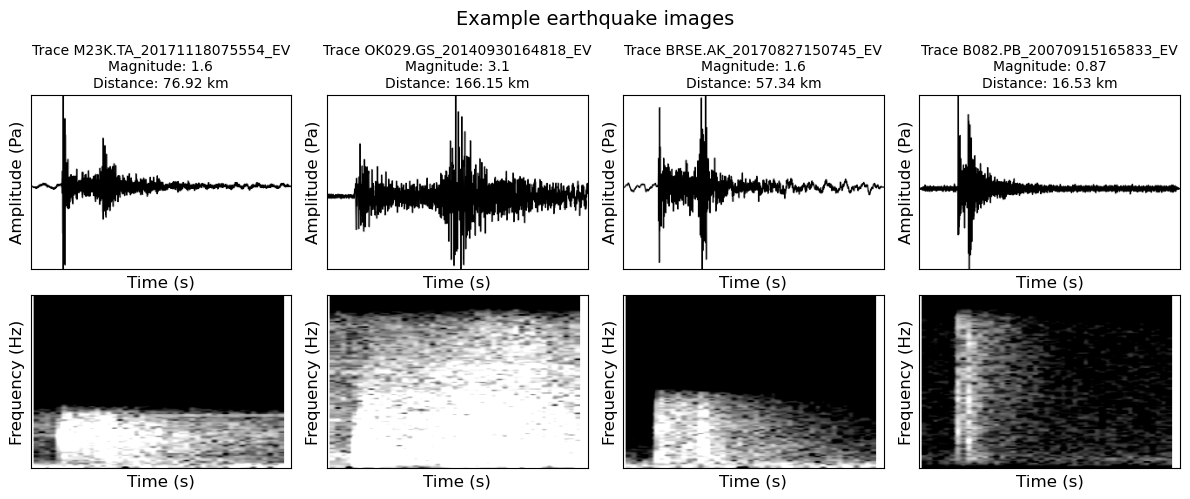

In [22]:
# Plot example earthquakes - waveforms and spectrograms
fig, axs = plt.subplots(2,4,figsize=(12,5))
count = 0
for i, ax in enumerate(axs.flatten()):
    if count < 4:
        ax.imshow(example_earthquake_waveforms[i])
        ax.set_ylabel('Amplitude (Pa)',fontsize=12)
        ax.set_xlabel('Time (s)',fontsize=12)
        trace_name = example_earthquakes.iloc[i]['trace_name']
        mag = example_earthquakes.iloc[i]['source_magnitude']
        dist = example_earthquakes.iloc[i]['source_distance_km']
        ax.set_title(f'Trace {trace_name}\nMagnitude: {mag}\nDistance: {dist} km', fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax.imshow(example_earthquake_spectrograms[i-4])
        ax.set_ylabel('Frequency (Hz)',fontsize=12)
        ax.set_xlabel('Time (s)',fontsize=12)   
        ax.set_xticks([])
        ax.set_yticks([])
    count += 1
plt.suptitle(f'Example earthquake images',fontsize=14)
plt.tight_layout()
plt.show()

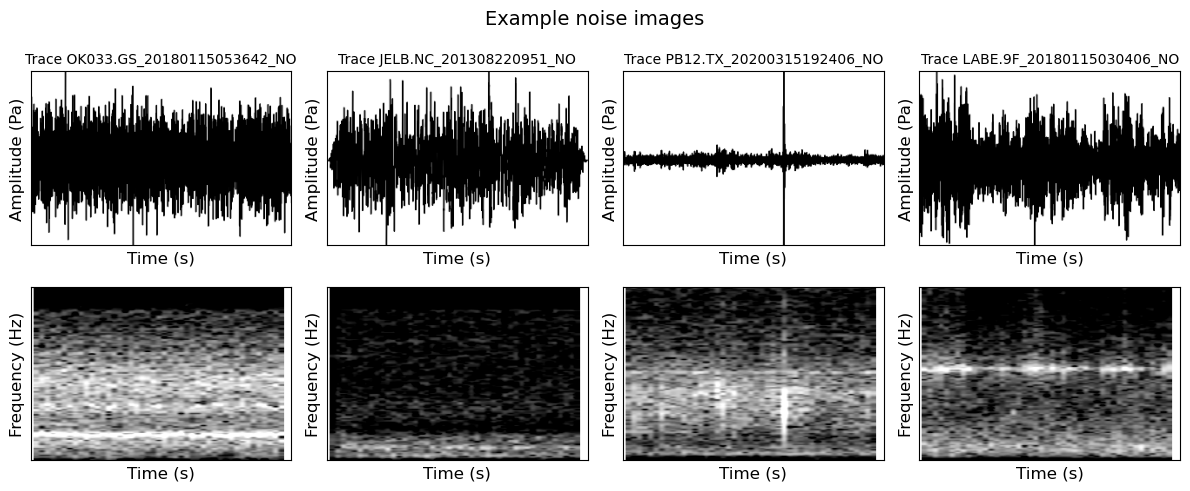

In [23]:
# Plot example noise - waveforms and spectrograms
fig, axs = plt.subplots(2,4,figsize=(12,5))
count = 0
for i, ax in enumerate(axs.flatten()):
    if count < 4:
        ax.imshow(example_noise_waveforms[i])
        ax.set_ylabel('Amplitude (Pa)',fontsize=12)
        ax.set_xlabel('Time (s)',fontsize=12)
        trace_name = example_noise.iloc[i]['trace_name']
        ax.set_title(f'Trace {trace_name}', fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax.imshow(example_noise_spectrograms[i-4])
        ax.set_ylabel('Frequency (Hz)',fontsize=12)
        ax.set_xlabel('Time (s)',fontsize=12)   
        ax.set_xticks([])
        ax.set_yticks([])
    count += 1
plt.suptitle(f'Example noise images',fontsize=14)
plt.tight_layout()
plt.show()